# Assessment Examples

This notebook demonstrates functionalities related to the class `AssessmentVisualization`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ThreeWToolkit.assessment.assessment_visualizations import AssessmentVisualization
from ThreeWToolkit.core.base_assessment_visualization import AssessmentVisualizationConfig

# Fix seed for experiments
np.random.seed(42)

-----------

## Examples with `plot_confusion_matrix`:

#### Using `pandas Series`

class_names=['A', 'B', 'C']


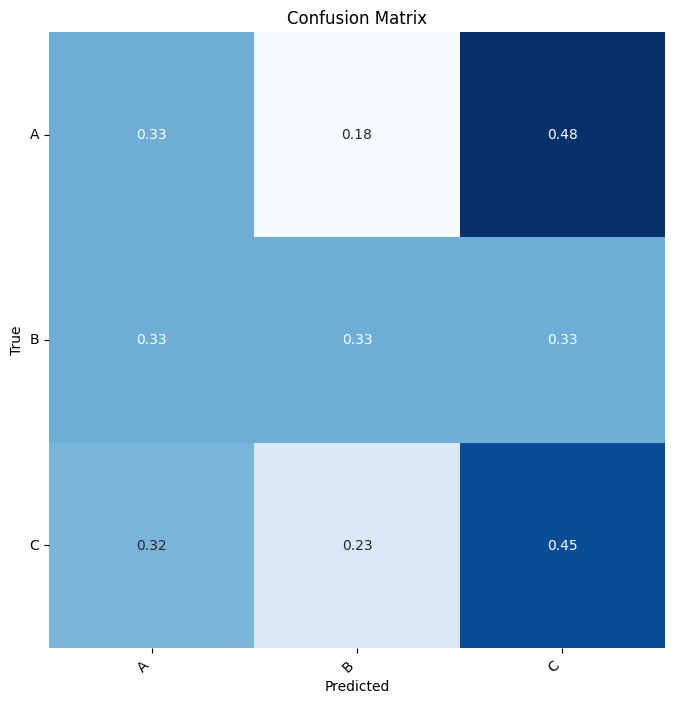

In [2]:
# Create configuration class and plotter instance
config = AssessmentVisualizationConfig(class_names=["A", "B", "C"])
plotter = AssessmentVisualization(config=config)
print(config)

# Generate example data
dates = pd.date_range("2023-01-01", periods=100, freq="h")
y_true_series = pd.Series(
    np.random.choice([0, 1, 2], size=100), index=dates, name="True State"
)
y_pred_series = pd.Series(
    np.random.choice([0, 1, 2], size=100), index=dates, name="Predicted State"
)

# Plot confusion matrix
confusion_matrix = plotter.plot_confusion_matrix(
    y_pred=y_pred_series, y_true=y_true_series
)

#### Using `numpy` arrays

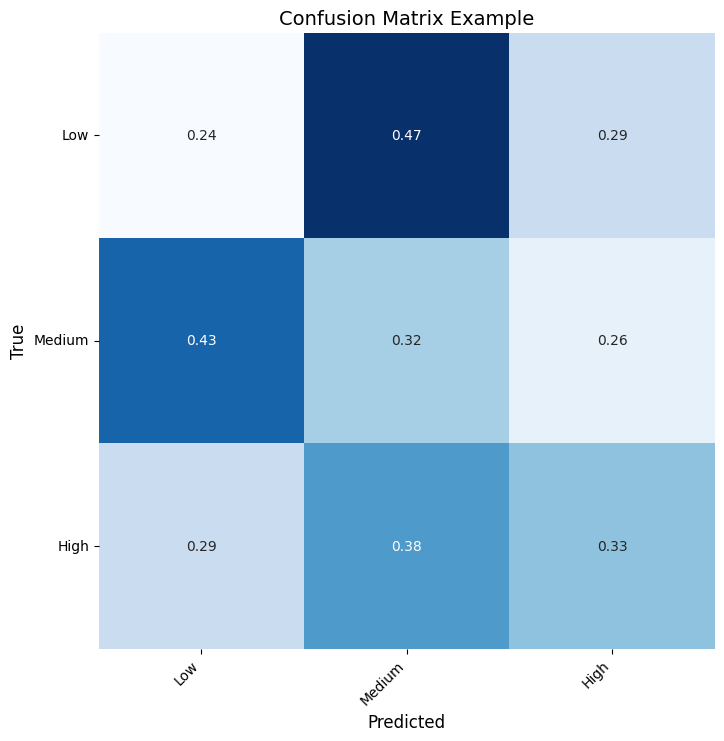

In [3]:
y_true_array = np.random.randint(0, 3, size=150)  # 150 samples, 3 classes
y_pred_array = np.random.randint(0, 3, size=150)

config = AssessmentVisualizationConfig(class_names=["Low", "Medium", "High"])
plotter = AssessmentVisualization(config=config)

confusion_matrix = plotter.plot_confusion_matrix(
    y_pred=y_pred_array,
    y_true=y_true_array,
    figsize=(10, 8),
    title="Confusion Matrix Example",
    fontsize=12,
    normalize=True,
)


#### Using python `lists`

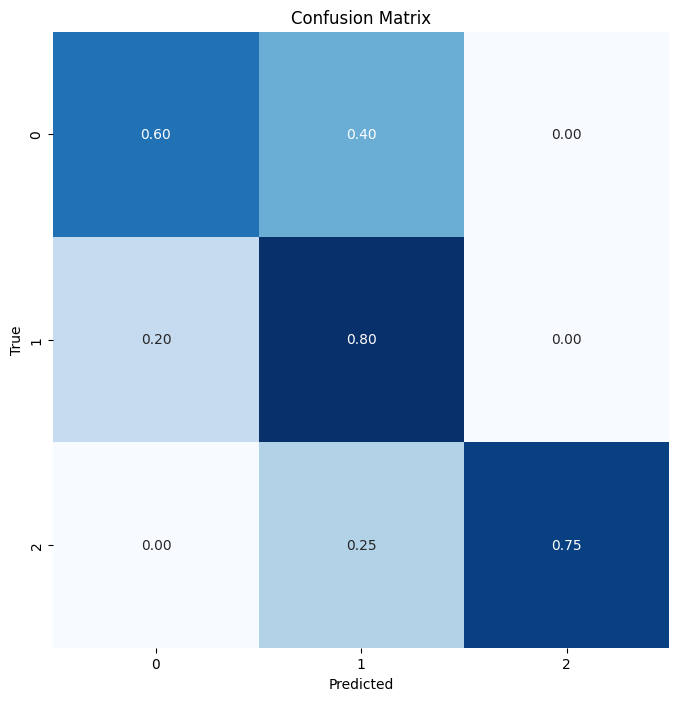

In [4]:
y_true_list = [0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2]
y_pred_list = [0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2]

# Config without class names
config = AssessmentVisualizationConfig()
plotter = AssessmentVisualization(config=config)


confusion_matrix = plotter.plot_confusion_matrix(y_true=y_true_list, y_pred=y_pred_list)

-----------

## Examples with `feature_visualization`

#### Using random feature importances

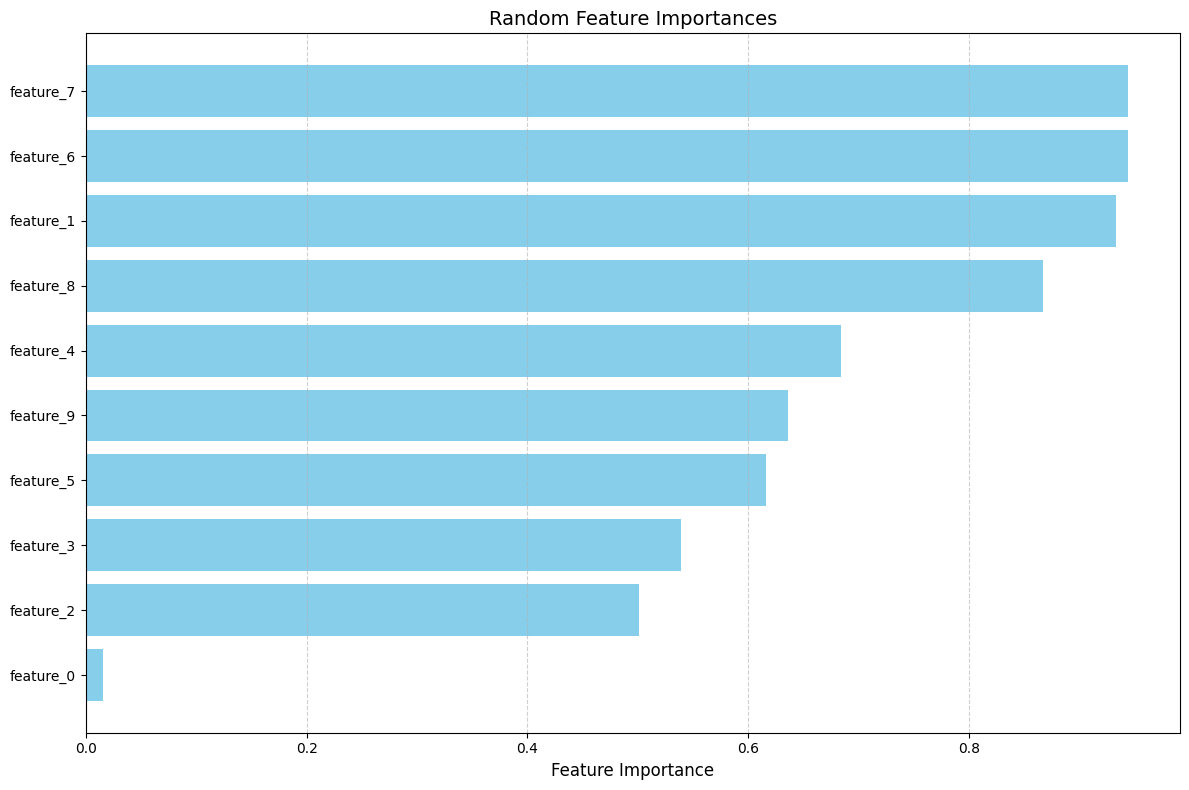

In [5]:
feature_names = [f"feature_{i}" for i in range(10)]
feature_importances = np.random.rand(10)

config = AssessmentVisualizationConfig()
visualizer = AssessmentVisualization(config)

fig = visualizer.feature_visualization(
    feature_importances=feature_importances,
    feature_names=feature_names,
    title="Random Feature Importances",
)
plt.show()

#### Customizing our plot


Let us customize our plot by displaying only the *top 5 features*, applying a *custom color*, and *changing the default figure size*:

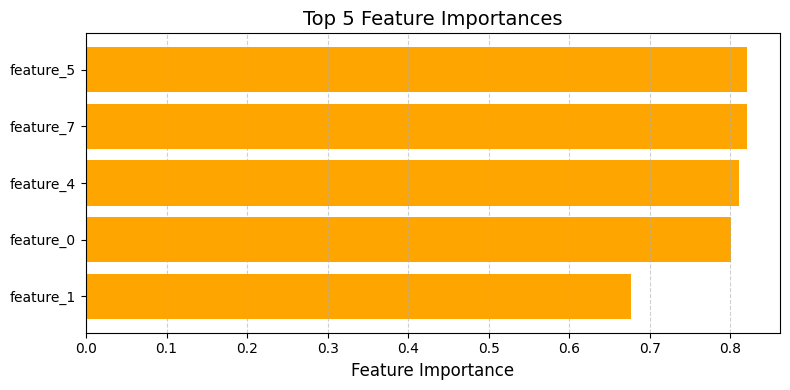

In [6]:
feature_names = [f"feature_{i}" for i in range(10)]
feature_importances = np.random.rand(10)

fig = visualizer.feature_visualization(
    feature_importances=feature_importances,
    feature_names=feature_names,
    top_n=5,
    color="orange",
    title="Top 5 Feature Importances",
    figsize=(8, 4),
)
plt.show()

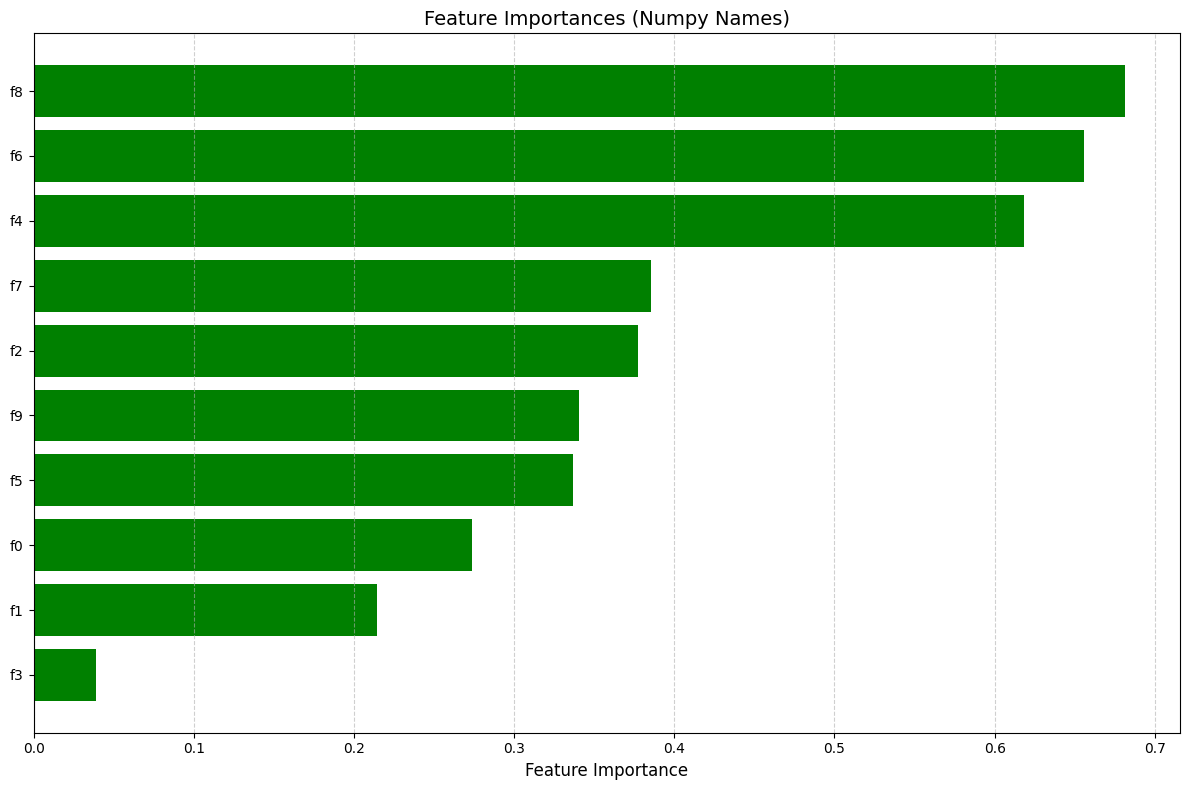

In [7]:
# Example 3: Provide feature names as a numpy array and use a different color
feature_names_np = np.array([f"f{i}" for i in range(10)])
feature_importances = np.random.rand(10)

fig = visualizer.feature_visualization(
    feature_importances=feature_importances,
    feature_names=feature_names_np,
    color="green",
    title="Feature Importances (Numpy Names)",
)
plt.show()


#### Displaying feature importances of a Random Forest classifier

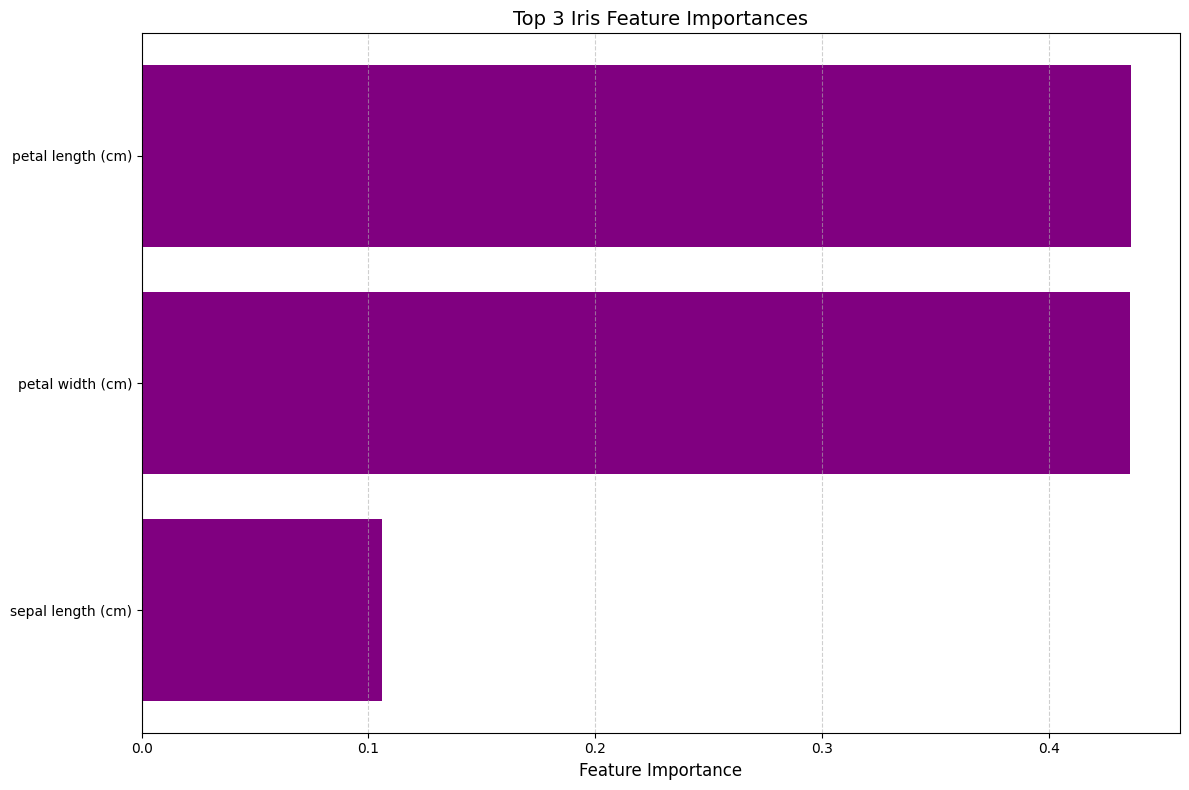

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x, y = iris.data, iris.target
model = RandomForestClassifier(random_state=42).fit(x, y)

fig = visualizer.feature_visualization(
    feature_importances=model.feature_importances_,
    feature_names=iris.feature_names,
    top_n=3,
    color="purple",
    title="Top 3 Iris Feature Importances",
)
plt.show()